In [ ]:
import numpy as np
import pandas as pd

In [ ]:
DataCoSupplyChainDataset = pd.read_csv("DataCoSupplyChainDataset.csv", header= 0,encoding= 'unicode_escape')

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

In [ ]:
DataCoSupplyChainDataset.describe()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
DataCoSupplyChainDataset.shape

(180519, 53)

In [ ]:
DataCoSupplyChainDataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
DataCoSupplyChainDataset.info

<bound method DataFrame.info of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

In [ ]:
DataCoSupplyChainDataset.isnull().any()

Type                             False
Days for shipping (real)         False
Days for shipment (scheduled)    False
Benefit per order                False
Sales per customer               False
Delivery Status                  False
Late_delivery_risk               False
Category Id                      False
Category Name                    False
Customer City                    False
Customer Country                 False
Customer Email                   False
Customer Fname                   False
Customer Id                      False
Customer Lname                    True
Customer Password                False
Customer Segment                 False
Customer State                   False
Customer Street                  False
Customer Zipcode                  True
Department Id                    False
Department Name                  False
Latitude                         False
Longitude                        False
Market                           False
Order City               

In [ ]:
def data_info(data):
    print('Number of columns : ',data.shape[1])
    print('Number of rows  : ',data.shape[0])
    print('Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features :',len(cat_features))
data_info(DataCoSupplyChainDataset)


Number of columns :  53
Number of rows  :  180519
Total number of data-points : 9567507
Count of Numerical Features : 29
Count of Categorical Features : 24


In [ ]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values ' ,round(x,2) ,'%')
    print('Missing Value Information :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print(i + " = " +str(data[i].isna().sum()))

features_with_missing_values(DataCoSupplyChainDataset)

Percentage of Total Missing Values  3.51 %
Missing Value Information :
Customer Lname = 8
Customer Zipcode = 3
Order Zipcode = 155679
Product Description = 180519


In [ ]:
DataCoSupplyChainDataset['order_date'] = pd.to_datetime(DataCoSupplyChainDataset['order date (DateOrders)'])
DataCoSupplyChainDataset['shipping_date']=pd.to_datetime(DataCoSupplyChainDataset['shipping date (DateOrders)'])

In [ ]:

DataCoSupplyChainDataset['order_year'] = pd.DatetimeIndex(DataCoSupplyChainDataset['order_date']).year
DataCoSupplyChainDataset['order_month'] = pd.DatetimeIndex(DataCoSupplyChainDataset['order_date']).month
DataCoSupplyChainDataset['order_day'] = pd.DatetimeIndex(DataCoSupplyChainDataset['order_date']).day
DataCoSupplyChainDataset['shipping_year'] = pd.DatetimeIndex(DataCoSupplyChainDataset['shipping_date']).year
DataCoSupplyChainDataset['shipping_month'] = pd.DatetimeIndex(DataCoSupplyChainDataset['shipping_date']).month
DataCoSupplyChainDataset['shipping_day'] = pd.DatetimeIndex(DataCoSupplyChainDataset['shipping_date']).day

In [ ]:
new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']
len(new_dataset_features)

21

In [ ]:
DataCoSupplyChainDataset = DataCoSupplyChainDataset[new_dataset_features]
DataCoSupplyChainDataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,...,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,...,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,...,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,...,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,...,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,...,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


In [ ]:
model_data = pd.get_dummies(DataCoSupplyChainDataset)
model_data.shape

(180519, 3823)

In [ ]:
x = model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
x.shape,y.shape

((180519, 3821), (180519, 2))

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.15)

In [ ]:
r_scores = []

In [ ]:
# import regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

# Evaluate the performance of linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)
r_scores.append(r2_linear)

print("Linear Regression:")
print(f'Mean Squared Error: {mse_linear}')
print(f'R-Squared : {r2_linear}')

Linear Regression:
Mean Squared Error: 0.02987379564755963
R-Squared : 0.9884425588785509


In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Evaluate the performance of random forest regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
r_scores.append(r2_rf)

print("Random Forest Regressor :")
print(f'Mean Squared Error: {mse_rf}')
print(f'R-Squared : {r2_rf}')

Random Forest Regressor :
Mean Squared Error: 0.008129450107098202
R-Squared : 0.9968549145186972


In [ ]:
# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100,max_depth=None, random_state=42)
et_model.fit(x_train, y_train)
y_pred_et = et_model.predict(x_test)

# Evaluate the performance of extra trees regressor
mse_et= mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test,y_pred_et)
r_scores.append(r2_et)

print("Extra Trees Regressor :")
print(f'Mean Squared Error: {mse_et}')
print(f'R-Squared : {r2_et}')

Extra Trees Regressor :
Mean Squared Error: 0.005976918531649351
R-Squared : 0.9976876763558207


In [ ]:
#K neighbor regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)

In [ ]:
# Evaluate the performance of KNN Regressor
mse_knn= mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test,y_pred_knn)
r_scores.append(r2_knn)

print("KNeighbors Rgressor :")
print(f'Mean Squared Error: {mse_knn}')
print(f'R-Squared : {r2_knn}')

KNeighbors Rgressor :
Mean Squared Error: 2.055965728635847
R-Squared : 0.06523079504488788


In [ ]:
#Bagging Regressor
base_estimator = DecisionTreeRegressor()
br_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, max_samples=1.0,
                                     max_features=1.0, bootstrap=True, bootstrap_features=False,
                                     oob_score=False, random_state=42)

# Fit the model to the training data
br_model.fit(x_train, y_train)
y_pred_br = br_model.predict(x_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Evaluate the performance of KNN Regressor
mse_br= mean_squared_error(y_test, y_pred_br)
r2_br = r2_score(y_test,y_pred_br)
r_scores.append(r2_br)

print("MLP Rgressor :")
print(f'Mean Squared Error: {mse_br}')
print(f'R-Squared : {r2_br}')

MLP Rgressor :
Mean Squared Error: 0.008161638599601341
R-Squared : 0.9968424615779568


In [ ]:
#MLP Regressor
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor with desired parameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

# Fit the model to the training data
mlp_regressor.fit(x_train, y_train)
y_predict_mlp = mlp_regressor.predict(x_test)

In [ ]:
# Evaluate the performance of KNN Regressor
mse_mlp= mean_squared_error(y_test, y_predict_mlp)
r2_mlp = r2_score(y_test,y_predict_mlp)
r_scores.append(r2_mlp)

print("MLP Rgressor :")
print(f'Mean Squared Error: {mse_mlp}')
print(f'R-Squared : {r2_mlp}')

MLP Rgressor :
Mean Squared Error: 0.19022420333979287
R-Squared : 0.9255486158854569


In [ ]:
print(r_scores)

[0.9884425588785509, 0.9884425588785509, 0.9968549145186972, 0.9976876763558207, 0.06523079504488788, 0.9968424615779568, 0.9255486158854569, 0.9968424615779568]


In [ ]:
mse_scores = [0.02987379564755963,0.008129450107098202,0.005976918531649351,2.055965728635847,0.19022420333979287,0.008161638599601341]

In [ ]:
reg_names = ['Linear Regression','Random Forest Regressor','Extra Trees Regressor','KNeighborRegressor','MLP Regressor','Bagging Regressor']

,r2
LinearRegression,0.988443
RandomForest Regressor,0.996855
Extra Trees Regressor,0.997688
KNeighborRegressor,0.065231
MLP Regressor,0.925549
Bagging Regressor,0.996842


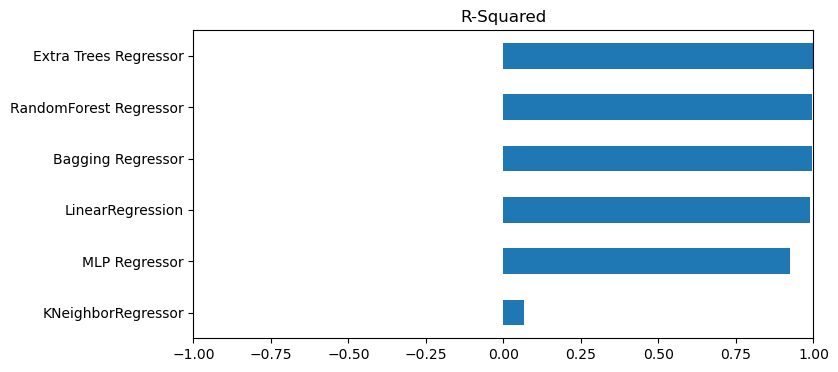

In [ ]:
import pandas as pd

r2_scores = [0.9884425588785509, 0.9968549145186972, 0.9976876763558207, 0.06523079504488788, 0.9255486158854569, 0.9968424615779568]
reg_names = ['LinearRegression', 'RandomForest Regressor', 'Extra Trees Regressor', 'KNeighborRegressor', 'MLP Regressor', 'Bagging Regressor']

# Create a dictionary with keys as column names and values as data
data = {'r2': r2_scores}

# Create DataFrame using the dictionary and set the index to reg_names
r2_rmse_df = pd.DataFrame(data, index=reg_names)

# Plot the R-squared values
r2_rmse_df['r2'].sort_values().plot(kind="barh", xlim=(-1,1), title="R-Squared", figsize=(8,4), cmap="tab20")
r2_rmse_df

In [ ]:
data = {'mse': mse_scores}

# Create DataFrame using the dictionary and set the index to reg_names
mse_df = pd.DataFrame(data, index=reg_names)
mse_df['mse'].sort_values()
print(mse_df)
print(np.sqrt(mse_scores[5]))

                             mse
LinearRegression        0.029874
RandomForest Regressor  0.008129
Extra Trees Regressor   0.005977
KNeighborRegressor      2.055966
MLP Regressor           0.190224
Bagging Regressor       0.008162
0.09034178767105144
